<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

[Prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Numerično reševanje diferencialnih enačb - robni problem</b></font>
<img src="">
<font size="2">Februar 2022</font>
</center>

<h1>Kazalo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reševanje-dvotočkovnih-robnih-problemov" data-toc-modified-id="Reševanje-dvotočkovnih-robnih-problemov-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reševanje dvotočkovnih robnih problemov</a></span></li><li><span><a href="#Strelska-metoda" data-toc-modified-id="Strelska-metoda-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Strelska metoda</a></span><ul class="toc-item"><li><span><a href="#Numerični-zgled:-poševni-met" data-toc-modified-id="Numerični-zgled:-poševni-met-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerični zgled: poševni met</a></span><ul class="toc-item"><li><span><a href="#Vertikalni-met" data-toc-modified-id="Vertikalni-met-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Vertikalni met</a></span></li><li><span><a href="#Poševni-met" data-toc-modified-id="Poševni-met-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Poševni met</a></span></li></ul></li><li><span><a href="#Uporaba-scipy.integrate.solve_bvp" data-toc-modified-id="Uporaba-scipy.integrate.solve_bvp-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Uporaba <code>scipy.integrate.solve_bvp</code></a></span></li><li><span><a href="#Numerični-zgled:-nosilec-z-obremenitvijo" data-toc-modified-id="Numerični-zgled:-nosilec-z-obremenitvijo-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Numerični zgled: nosilec z obremenitvijo</a></span></li></ul></li><li><span><a href="#Metoda-končnih-razlik" data-toc-modified-id="Metoda-končnih-razlik-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metoda končnih razlik</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ocena-napake" data-toc-modified-id="Ocena-napake-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Ocena napake</a></span></li></ul></li><li><span><a href="#Numerični-zgled:-vertikalni-met" data-toc-modified-id="Numerični-zgled:-vertikalni-met-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numerični zgled: vertikalni met</a></span></li><li><span><a href="#Numerični-zgled:-nosilec-z-obremenitvijo" data-toc-modified-id="Numerični-zgled:-nosilec-z-obremenitvijo-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Numerični zgled: nosilec z obremenitvijo</a></span></li></ul></li><li><span><a href="#Dodatno:-simbolna-rešitev-nosilca" data-toc-modified-id="Dodatno:-simbolna-rešitev-nosilca-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dodatno: simbolna rešitev nosilca</a></span></li></ul></div>

# Reševanje dvotočkovnih robnih problemov

Pod dvotočkovnim robnim problemom razumemo navadno diferencialno enačbo drugega reda oblike:

$$\ddot y=f(t, y, \dot y),$$

ob predpisanih *robnih pogojih*:

$$y(a)=\alpha\qquad\textrm{in}\qquad y(b)=\beta.$$

Metode, ki smo jih spoznali pri reševanju *začetnih problemov*, tukaj neposredno niso uporabne, ker nimamo podanega odvoda v začetni točki pri $t=a$.

V nadaljevanju si bomo pogledali dva različna pristopa k reševanju robnih problemov:

1. t. i. **strelska metoda**,
2. **metoda končnih razlik**.

# Strelska metoda

Rešujemo robni problem:

$$\ddot y=f(t, y, \dot y),\qquad y(a)=\alpha,\quad y(b)=\beta,$$

ki ga prevedemo na začetni problem tako, da si izberemo:

$$\dot y (a)=u.$$

Problem rešimo z numeričnimi metodami reševanja začetnega problema in rešitev označimo z $\theta(u, t)$.

Robni problem rešimo, ko izberemo $u$ tako, da velja:

$$r(u)=\theta(u,b)-\beta=0.$$

Dobili smo nelinearno enačbo, ki jo moramo rešiti; za izračun vrednosti mejnih preostankov $r(u)$ moramo numerično rešiti začetni problem.

Za rešitev enačbe $r(u)=0$ lahko uporabimo sekantno metodo. Izberemo $u_0$ in $u_1$ in na $i$-tem koraku izračunamo:

$$u_{i+1}=u_i-r(u_i)\,\frac{u_{i}-u_{i-1}}{r(u_{i})-r(u_{i-1})},\qquad i=2,3,\dots$$

Zaključimo, ko je:
$$\left|r(u_{i+1})\right|<\epsilon.$$

Rešitev strelske metode je obremenjena z napako metode reševanja nelinearne enačbe $\epsilon$ in z napako numerične metode za reševanje začetnega problema.

## Numerični zgled: poševni met

Na sliki je prikazan izstrelek mase $m$, ki ga izstrelimo s hitrostjo $\textbf{v}_0$.
<img src="./fig/posevni_met.png" width=300>

Velikost sile upora zraka je $|\textbf{F}|=c\,|\textbf{v}|^2$, potem sta gibalni enačbi:

$$x''(t)=-F_x/m\qquad\ddot y(t)=-F_y/m-g.$$

Komponente sile so (glejte izpeljavo pri poglavju iz reševanja začetnega problema sistema diferencialnih enačb):
$$F_x=-c\,x'\,\sqrt{x'^2+y'^2},\qquad F_y=-c\,y'\,\sqrt{x'^2+y'^2}.$$

### Vertikalni met

Najprej predpostavimo, da je $\varphi=90$° in torej v $x$ smeri nimamo gibanja. Zanima nas rešitev, ko izstrelek izstrelimo iz višine $y=0\,$m in mora pri času $t=b=1\,$s biti na višini $y(b)=10\,$m. Definirali smo robni problem:

$$y''(t)=F_y\,/m-g,\qquad y(0)=0,\quad y(1)=10.$$

Najprej moramo enačbo drugega reda:

$$y''=f(t, y, y') = F_y/m-g$$

preoblikovati na sistem dveh enačb prvega reda. Uporabimo $y_i=y^{i}$ ter upoštevamo $F_y=-c\,y'\,\sqrt{y'^2}$.

Odvajamo $y_i'=y_{i+1}$ in pripravimo sistem enačb prvega reda:

$$
\begin{array}{rcl}
y'_0&=&y_1\\
y'_1&=&-c\,y'\,\sqrt{y'^2}/m-g
\end{array}
$$

Pripravimo seznam funkcij desnih strani:

In [1]:
def f_vert(t, y, g=9.81, m=1., c=0.5):
    return np.array([y[1], -g-c*y[1]*np.sqrt(y[1]**2)/m])

Uvozimo modula `numpy` in `scipy.integrate.solve_ivp`:

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

ter pripravimo funkcijo za izračun mejnega preostanka pri času $b$ v odvisnosti od začetne hitrosti $v_0$ (privzeti zračni upor je $c=0.1$):

In [3]:
def r(v0=100., t=None, ciljna_lega=10., g=9.81, m=1., c=0.1):
    def f_vert_tmp(t, y): # pripravimo funkcijo z željenimi parametri
        return f_vert(t, y, g=g, m=m, c=c)
    sol = solve_ivp(f_vert_tmp, t_span=(t[0], t[-1]), y0=np.array([0., v0]))
    r = sol.y[0,-1] - ciljna_lega
    return r

Preverimo mejni preostanek pri začetnem pogoju $v_0=y'=50$ m/s:

In [4]:
t = np.linspace(0, 1, 100)
r(v0=50., t=t)

5.634550939997352

Opazimo, da je masa pri 1 sekundi 5,635 m nad ciljno višino.

Naš cilj je, da pri 1 sekundi masa doseže lego 10 m z natančnostjo `1e-6`:

In [5]:
ciljna_lega = 10
epsilon = 1e-6

Izvedimo sedaj sekantno metodo:

In [6]:
x0 = 100
x1 = 50
for i in range(10):
    f0 = r(v0=x0, t=t, ciljna_lega=ciljna_lega)
    f1 = r(v0=x1, t=t, ciljna_lega=ciljna_lega)
    x2 = x1 - f1 * (x1 - x0)/(f1 - f0)
    err = r(v0=x2, t=t, ciljna_lega=ciljna_lega)
    print(f'Novi približek je {x2}, napaka je {err}.')
    x0 = x1
    x1 = x2
    if abs(err)<epsilon:
        rešitev = x2
        print(f'Rešitev {rešitev}')
        break

Novi približek je 5.644178759347092, napaka je -9.672536331804437.
Novi približek je 33.67258709458858, napaka je 2.2187017725280267.
Novi približek je 28.442965190719505, napaka je 0.8225839451367349.
Novi približek je 25.361704474139287, napaka je -0.10153714557801585.
Novi približek je 25.700255797214542, napaka je 0.004276366407129473.
Novi približek je 25.686573522825128, napaka je 2.1630891925639162e-05.
Novi približek je 25.686503962732015, napaka je -4.623824878535743e-09.
Rešitev 25.686503962732015


Poglejmo si sedaj izračunano rešitev:

In [7]:
sol = solve_ivp(lambda t, y: f_vert(t, y, c=0.1),
                t_span=(t[0], t[-1]), y0=np.array([0., rešitev]),
                t_eval=t
               )

Zgoraj smo uporabili `lambda` izraz ([dokumentacija](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)). Izraz `lambda t, y: f_vert(t, y, c=0.1)` je ekvivalenten:

```python
def ime_funkcije(t, y):
    return f_vert(t, y, c=0.1)
```

Uvozimo `matplotlib`:

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Prikažemo rezultat:

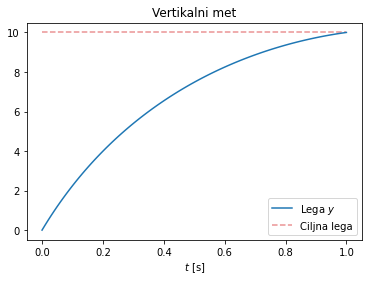

In [9]:
plt.title('Vertikalni met')
plt.hlines(ciljna_lega,0., 1, 'C3', linestyles='dashed', label='Ciljna lega', alpha=0.5)
plt.plot(sol.t, sol.y[0], label='Lega $y$')
plt.xlabel('$t$ [s]')
plt.legend(loc=4)
plt.show()

### Poševni met

Poglejmo si sedaj splošen poševni met (diferencialne enačbe so definirana že zgoraj). Najprej moramo sistem diferencialnih enačb drugega reda preoblikovati v sistem enačb prvega reda. 

Uporabimo:
$$y_0=x,~ y_1=x',~ y_2=y,~ y_3=y'$$

in dobimo sistem diferencialnih enačb prvega reda:

$$
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&F_x/m\\
y_2'&=&y_3\\
y_3'&=&F_y/m-g.\\
\end{array}
$$

Pripravimo seznam funkcij desnih strani:

In [10]:
def f_poševno(t, y, g=9.81, m=1., c=0.1):
    x, vx, yy, vy = y
    return np.array([vx, -c*vx*np.sqrt(vx**2+vy**2)/m, vy, -g-c*vy*np.sqrt(vx**2+vy**2)/m])

Pripravimo še funkcijo za izračun mejnega preostanka pri času $b=1$ v odvisnosti od vektorja začetne hitrosti $\mathbf{v}_0$:

In [11]:
def r_poševno(v0=[5., 100.], t=None, ciljna_lega=np.array([10, 5.]), g=9.81, m=1., c=0.1):
    sol = solve_ivp(lambda t, y: f_poševno(t, y, g=g, m=m, c=c),
                      t_span=(t[0], t[-1]),
                      y0=[0, v0[0], 0, v0[1]])
    r = sol.y[0:3:2, -1] - ciljna_lega
    return r

Preverimo mejni preostanek pri začetnem pogoju $\mathbf{v}_0=[100., 100.]\,$m/s:

In [12]:
r_poševno(v0=[100., 100.],t=t)

array([ 9.66195325, 11.84726075])

Za iskanje korena sistema nelinearnih funkcij smo že spoznali funkcijo ``scipy.optimize.root`` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html)):

```python
root(fun, x0, args=(), method='hybr', jac=None,
     tol=None, callback=None, options=None)
```
Najprej jo uvozimo:

In [13]:
from scipy import optimize

Potem uporabimo z začetnim ugibanjem $\mathbf{v}_0$:

In [14]:
rešitev = optimize.root(r_poševno, np.array([100., 100.]), args=(t))

Rešitev je:

In [15]:
rešitev

    fjac: array([[-0.93392959,  0.35745703],
       [-0.35745703, -0.93392959]])
     fun: array([ 1.15463195e-13, -3.25961480e-13])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([ 1.06701940e-09, -1.31133975e-09])
       r: array([-0.40775373,  0.24087449, -0.37544067])
  status: 1
 success: True
       x: array([19.37894314, 16.55482478])

Atribut `rešitev.x` vsebuje vektor izračunanih rešitev (`[19.37894314,  16.55482478]`). Preverimo mejni preostanek pri izračunani rešitvi:

In [16]:
r_poševno(v0=rešitev.x, t=t)

array([ 1.15463195e-13, -3.25961480e-13])

Poglejmo si sedaj izračunano rešitev:

In [17]:
sol = solve_ivp(lambda t, y: f_poševno(t, y, g=9.81, m=1., c=.1),
                t_span=(t[0], t[-1]),
                y0=[0, rešitev.x[0], 0, rešitev.x[1]],
                t_eval=t)

Prikažemo rezultat:

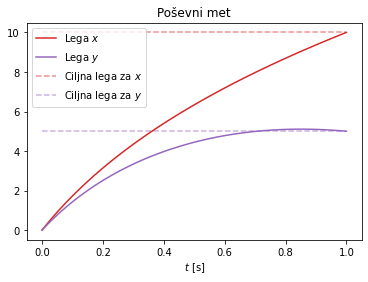

In [18]:
plt.title('Poševni met')
plt.hlines(10,0., 1, 'C3', linestyles='dashed', label='Ciljna lega za $x$', alpha=0.5)
plt.hlines(5,0., 1, 'C4', linestyles='dashed', label='Ciljna lega za $y$', alpha=0.5)
plt.plot(sol.t, sol.y[0], label='Lega $x$', color='C3')
plt.plot(sol.t, sol.y[2], label='Lega $y$', color='C4')
plt.xlabel('$t$ [s]')
plt.legend()
plt.show()

## Uporaba `scipy.integrate.solve_bvp`

Namesto `scipy.integrate.solve_ivp` in `scipy.optimize` lahko uporabimo vgrajeno funkcijo za reševanje robnih problemov `scipy.integrate.solve_bvp` (BVP - *angl.* Boundary Value Problem):
```python
scipy.integrate.solve_bvp(fun, bc, x, y, 
                          p=None, S=None, fun_jac=None, bc_jac=None, 
                          tol=0.001, max_nodes=1000, verbose=0)
```

Pojasnilo vseh argumentov je v [dokumentaciji](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html#scipy-integrate-solve-bvp), tukaj bomo izpostavili nekatere:

* `fun` je desna stran (`func(t, y...)`),
* `bc` je mejni preostanek: `bc(y(a), y(b)) = 0`
* `x` numerično polje (dimenzija `(m)`) neodvisne spremenljivke `x[0]=a` in `x[-1]=b`,
* `y` numerično polje (dimenzija `(n, m)`) začetnih vrednosti.

Rezultat klicanja `solve_bvp` je objekt z atributi (izbrani):

* `x` vrednosti neodvisne spremenljivke pri katerih je izračunan rezultat,
* `y` rezultat,
* `sol` rezultat v obliki kubičnega zlepka,
* `success` je `True`, če je bila rešitev konvergirala.

Poglejmo primer:

In [19]:
from scipy.integrate import solve_bvp

Definirajmo neodvisno spremenljivko

In [20]:
t = np.linspace(0, 1, 15)

In mejni preostanek (želimo, da je pri času `b` lega $x=10$ m in $y=5$ m):

In [21]:
def mejni_preostanek(ya, yb):
    return np.array([ya[0], ya[2], yb[0]-10, yb[2]-5])

Definirajmo še začetne vrednosti hitrosti (kot začetno ugibanje):

In [22]:
y0 = np.zeros((4, t.size))
y0[1] = 5   # hitrost v x smeri
y0[3] = 100 # hitrost v y smeri

In rešimo robni problem in opis rezultata

In [23]:
sol = solve_bvp(lambda t, y: f_poševno(t, y, g=9.81, m=1., c=.1), 
                bc=mejni_preostanek, x=t, y=y0)

In [24]:
sol.message

'The algorithm converged to the desired accuracy.'

Prikažimo rezultat:

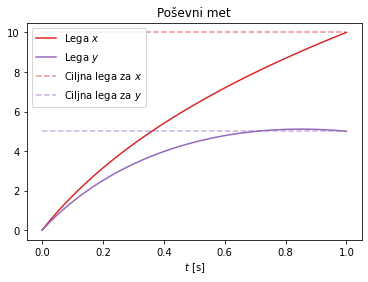

In [25]:
plt.title('Poševni met')
plt.hlines(10,0., 1, 'C3', linestyles='dashed', label='Ciljna lega za $x$', alpha=0.5)
plt.hlines(5,0., 1, 'C4', linestyles='dashed', label='Ciljna lega za $y$', alpha=0.5)
plt.plot(sol.x, sol.y[0], label='Lega $x$', color='C3')
plt.plot(sol.x, sol.y[2], label='Lega $y$', color='C4')
plt.xlabel('$t$ [s]')
plt.legend()
plt.show()

## Numerični zgled: nosilec z obremenitvijo

Poglejmo si nosilec:
<img src='./fig/nosilec.png' width=400>

Poves $w(x)$ nosilca popiše diferencialna enačba četrtega reda:

$$-E\,I\frac{\textrm{d}^4}{\textrm{d}x^4}w(x)+q(x)=0.$$

Znane konstante so $E,I,l$ in je $q(x)$ porazdeljena obremenitev.

Robni pogoji (členkasto vpet nosilec):
$$w(0)=w(l)=0\quad\textrm{in}\quad w''(0)=w''(l)=0$$

Parametri so: 

* $I=2.1\cdot10^{-5}\,$m$^4$, 
* $E=2.1\cdot10^{11}\,N/$m$^2$, 
* $l=10\,$m. 

Porazdeljena obremenitev $q(x)$ bo definirana pozneje.

Najprej moramo diferencialno enačbo četrtega reda preoblikovati v sistem diferencialnih enačb prvega reda. 
Uporabimo:
$$y_0=w,~ y_1=w',~ y_2=w'',~ y_3=w'''$$

in dobimo sistem diferencialnih enačb prvega reda:

$$
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&y_2\\
y_2'&=&y_3\\
y_3'&=&q(x)/(EI).\\
\end{array}
$$

Pripravimo različne porazdeljene obremenitve:

In [26]:
def q_konstanta(x, F_0=1e3, l=10):
    return -F_0*np.ones_like(x)

def q_trikotna(x, F_0=1e3, l=10):
    return -F_0*x/l

def q_pol_sinusna(x, F_0=1e3, l=10):
    return -F_0*np.sin(np.pi*x/l)

Definirajmo dolžino (ostale parametre, $I, E$, bomo uporabili privzete):

In [27]:
l = 10.

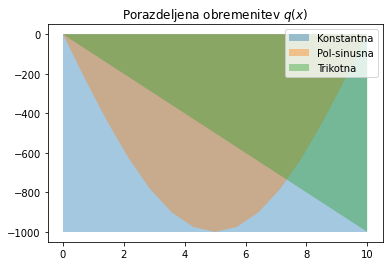

In [28]:
x = np.linspace(0, l, 15)
plt.fill_between(x, q_konstanta(x), alpha=0.4, label='Konstantna')
plt.fill_between(x, q_pol_sinusna(x), alpha=0.4, label='Pol-sinusna')
plt.fill_between(x, q_trikotna(x), alpha=0.4, label='Trikotna')
plt.title('Porazdeljena obremenitev $q(x)$')
plt.legend()
plt.show()

Pripravimo seznam funkcij desne strani:

In [29]:
def f_nosilec_konstanta(x, y, E=2.1e11, I=2.1e-5):
    return np.array([y[1], y[2], y[3], q_konstanta(x)/(E*I)], dtype=float)
def f_nosilec_pol_sinusna(x, y, E=2.1e11, I=2.1e-5):
    return np.array([y[1], y[2], y[3], q_pol_sinusna(x)/(E*I)])
def f_nosilec_trikotna(x, y, E=2.1e11, I=2.1e-5):
    return np.array([y[1], y[2], y[3], q_trikotna(x)/(E*I)])

Definirajmo sedaj robne pogoje oz. mejni preostanek (poves in moment sta na robovih enaka nič):

In [30]:
def mejni_nosilec(ya, yb):
    return np.array([ya[0], ya[2], yb[0], yb[2]])

Definirajmo še začetne vrednosti hitrosti (kot začetno ugibanje):

In [31]:
y0 = np.zeros((4, x.size), dtype=float)
y0[1] = 1. # w'
y0[3] = 1. # w'''

In rešimo robni problem (za vse tri tipe obremenitve):

In [32]:
sol_ko = solve_bvp(f_nosilec_konstanta, bc=mejni_nosilec, x=x, y=y0)
sol_pol_sin = solve_bvp(f_nosilec_pol_sinusna, bc=mejni_nosilec, x=x, y=y0)
sol_trikotna = solve_bvp(f_nosilec_trikotna, bc=mejni_nosilec, x=x, y=y0)

Rezultat prikažimo za konstantno obremenitev:

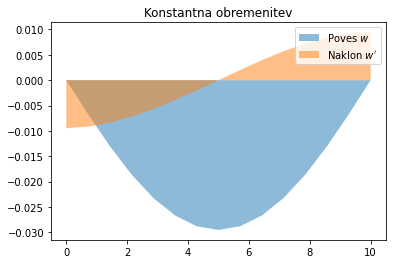

In [33]:
plt.fill_between(sol_ko.x, sol_ko.y[0], label='Poves $w$', alpha=0.5)
plt.fill_between(sol_ko.x, sol_ko.y[1], label='Naklon $w\'$', alpha=0.5)
plt.title('Konstantna obremenitev')
plt.legend()
plt.show()

In primerjavo povesa za različne tipe obremenitve:

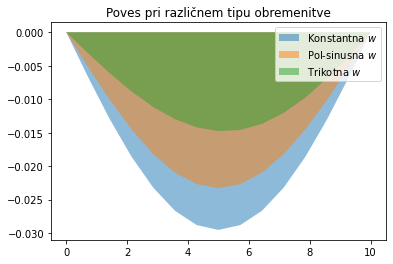

In [34]:
plt.fill_between(sol_ko.x, sol_ko.y[0], label='Konstantna $w$', alpha=0.5)
plt.fill_between(sol_pol_sin.x, sol_pol_sin.y[0], label='Pol-sinusna $w$', alpha=0.5)
plt.fill_between(sol_trikotna.x, sol_trikotna.y[0], label='Trikotna $w$', alpha=0.5)
plt.title('Poves pri različnem tipu obremenitve')
plt.legend()
plt.show()

# Metoda končnih razlik

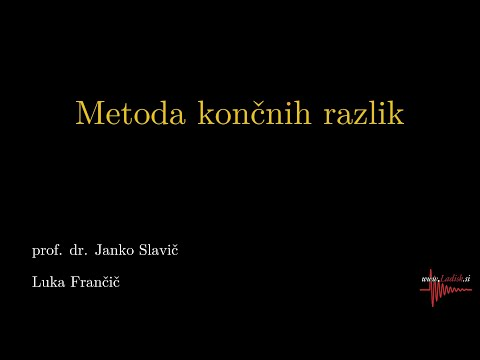

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo('YozKGsNYZ6Y', width=800, height=300)

Rešujemo robni problem:

$$y''=f(t, y, y'),\qquad y(a)=\alpha,\quad y(b)=\beta.$$

Velja torej: $$a=t_0,\quad b=t_{n-1}.$$

Pri metodi končnih razlik za reševanje robnega problema uporabimo diferenčno shemo. Predpostavimo, da imamo interval $[a,b]$, na katerem rešujemo diferencialno enačbo (neodvisna spremenljivka) razdeljeno na enake podintervale (točk je $n$):

$$t=[t_0, t_1,\dots, t_{n-1}].$$

Odvode nadomestimo s centralno diferenčno shemo:

|    Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$   |$y_{i-2}$|$y_{i-1}$ | $y_{i}$   |$y_{i+1}$ |$y_{i+2}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$y_i'=\frac{1}{h}\cdot$| 0     | -0.5 | 0 | 0.5 | 0|
|$y_i''=\frac{1}{h^2}\cdot$| 0 | 1 | -2 | 1 | 0|
|$y_i'''=\frac{1}{h^3}\cdot$| -0.5 | 1 | 0 | -1 | 0.5|
|$y_i^{(4)}=\frac{1}{h^4}\cdot$| 1 | -4 | 6 | -4 | 1|

Prikazana centralna diferenčna shema ima napako drugega reda $\mathcal{O}(h^{2})$.

V $i$-ti točki navadno differencialno enačbo drugega reda s centralimi diferencami zapišemo:

$$\frac{1}{h^2}\left(y_{i-1}-2\,y_{i}+y_{i+1}\right)+\mathcal{O}(h^{2})=f\left(t_i, y_i, 
\frac{1}{2h}\left(-y_{i-1}+y_{i+1}\right)+\mathcal{O}(h^{2})\right).$$

Če zanemarimo napako metode:

$$\frac{1}{h^2}\left(y_{i-1}-2\,y_{i}+y_{i+1}\right)=f\left(t_i, y_i, 
\frac{1}{2h}\left(-y_{i-1}+y_{i+1}\right)\right),\qquad i=1,2,\dots,n-2.$$

Zgornjo enačbo lahko zapišemo za $n-2$ notranjih točk, kar pomeni, da nam do rešljivega sistema enačb za $n$ neznank manjkata še dve enačbi. Ti dve enačbi sta robna pogoja:

$$y_0=\alpha,\quad y_{n-1}=\beta.$$

V primeru linearnega robnega problema moramo za izračun $n$ neznank $y_i$ rešiti sistem $n$ linearnih enačb (če je pa nelinearen, pa sistem nelinearnih enačb).

### Ocena napake

Točen rezultat $y(t_{i})$ pri velikosti koraka $h$ je:
$$y(t_{i})=y_{i,h}+E_{i,h},$$
kjer je $y_{i,h}$ numerični približek in $E_h$ napaka metode. Ker je globalna napaka drugega reda, lahko napako zapišemo:
$$E_{i,h}=k\,h^2,$$

Podobno lahko za velikost koraka $2h$ zapišemo:
$$y(t_{j})=y_{j,2h}+E_{j,2h},$$
kjer je $y_{j,2h}$ numerični približek in $E_{2h}$ napaka metode in je:
$$E_{j,2h}=k\,(2\,h)^2=4\,k\,h^2$$

Ob predpostavki, da je konstanta $k$ pri koraku $h$ in koraku $2h$ enaka, lahko določimo oceno napake pri boljšem približku $E_h$. Najprej izenačimo točna rezultat $y(t_{i})$ pri koraku $h$ in rezultat $y(t_{j})$ pri koraku $2h$ (velja $i=2\,j$, $j=1,2,\dots$):

$$y_{i,h}+k\,h^2=y_{j,2h}+4\,k\,h^2$$

sledi:

$$3\,k\,h^2=y_{2j,h}-y_{j,2h}$$

in nato izračunamo *oceno napake*:

$$E_{j,h}=\frac{y_{2j,h}-y_{j,2h}}{3}.$$

## Numerični zgled: vertikalni met

Zgoraj smo vertikalni met rešili s strelsko metodo; uporabimo sedaj metodo končnih razlik. Najprej robni problem:
$$y''(t)=F_y/m-g,\qquad y(0)=0,\quad y(1)=10.$$
zapisati s pomočjo centralne diferenčne sheme ($F_y=-c\,y'$):

$$\frac{1}{h^2}\left(y_{i-1}-2\,y_{i}+y_{i+1}\right)= -c\left(\frac{1}{2h}\left(-y_{i-1}+y_{i+1}\right)\right)/m-g.$$

(Tukaj smo predpostavili, da je zračni upor linearno odvisen od hitrost. V nasprotnem primeru bi imeli nelinearni robni problem, in posledično razvili sistem nelinearnih enačb.)

Zgornji izraz preoblikujemo:
$$(2-c\,h/m)\,y_{i-1}-4\,y_{i}+(2+c\,h/m)\,y_{i+1}=-2\,g\,h^2,\qquad i=1,2,\dots,n-2.$$

Robna pogoja sta:

$$y_0=0,\qquad y_{n-1}=10$$

Robni problem smo torej preoblikovali na sistem $n$ linearnih enačb. Poglejmo si sedaj konkreten izračun za $n=11$; najprej definirajmo konstante, časovni vektor `t` in korak `h`:

In [36]:
n = 11 # liho število
c = 0.5
m = 1.0
g = 9.81
t = np.linspace(0, 1, n)
h = t[1]

Nato nadaljujemo z izračunom tridiagonalne matrike koeficientov `A`. 

Pomagamo si s funkcijo `numpy.diag()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html)):

```python
numpy.diag(v, k=0)
```
s parametroma:

* `v` vektor, ki bo prirejen diagonali,
* `k` diagonala, kateri se priredi `v`. `k=0` uporabimo za glavno diagonalo, `k<0` oz. `k>0` uporabimo za  diagonale pod oz. nad glavno diagonalo.

In [37]:
A = np.diag(-4*np.ones(n), 0) + \
    (2-c*h/m)*np.diag(np.ones(n-1), -1) + \
    (2+c*h/m)*np.diag(np.ones(n-1), 1)
A[:4,:4]

array([[-4.  ,  2.05,  0.  ,  0.  ],
       [ 1.95, -4.  ,  2.05,  0.  ],
       [ 0.  ,  1.95, -4.  ,  2.05],
       [ 0.  ,  0.  ,  1.95, -4.  ]])

Definirajmo še vektor konstant:

In [38]:
b = -2*g*h**2 * np.ones(n)

Sedaj *popravimo* matriko koeficientov `A` in vektor konstant `b`, da zadostimo robnim pogojem:

$$y_0=0,\quad y_{n-1}=10.$$

In [39]:
A[0,0] = 1
A[0,1] = 0
A[-1,-2] = 0
A[-1,-1] = 1

In [40]:
b[0] = 0.
b[-1] = 10.

Rešimo sistem linearnih enačb:

In [41]:
y_mkr = np.linalg.solve(A, b)

Prikažemo rezultat:

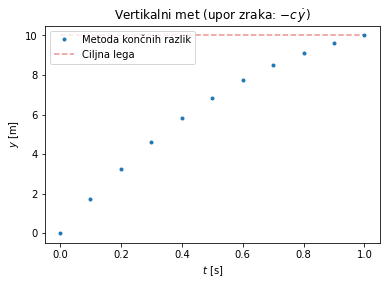

In [42]:
plt.title('Vertikalni met (upor zraka: $-c\,\dot y$)')
plt.hlines(10, 0, 1, 'C3', label='Ciljna lega', linestyles='dashed', alpha=0.5)
plt.plot(t, y_mkr, '.', label='Metoda končnih razlik')
plt.xlabel('$t$ [s]')
plt.ylabel('$y$ [m]')
plt.legend()
plt.show()

S pomočjo funkcije [`numpy.gradient()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html) izračunamo še hitrost in pospešek:

In [43]:
v_mkr = np.gradient(y_mkr,h, edge_order=2)
a_mkr = np.gradient(v_mkr,h, edge_order=2)
v_mkr[:4]

array([17.99109496, 16.20009044, 14.45276895, 12.79068266])

Izračunajmo sedaj še rezultat z dvojnim korakom:

In [44]:
n2h = n//2+1
t2h = np.linspace(0, 1, n2h)
h2h = t[1]
A2h = np.diag(-4*np.ones(n2h), 0) + \
    (2-c*h2h/(m))*np.diag(np.ones(n2h-1), -1) + \
    (2+c*h2h/(m))*np.diag(np.ones(n2h-1), 1)
b2h = -2*g*h2h**2 * np.ones(n2h)
A2h[0,0] = 1
A2h[0,1] = 0
A2h[-1,-1] = 1
A2h[-1,-2] = 0
b2h[0] = 0.
b2h[-1] = 10.
y2h_mkr = np.linalg.solve(A2h, b2h)

Primerjajmo prvih šest rezultatov pri koraku $2h$:

In [45]:
y2h_mkr[:6]

array([ 0.        ,  2.40584652,  4.59862736,  6.58873597,  8.38605878,
       10.        ])

z vsakim drugim rezultatom pri koraku $h$:

In [46]:
y_mkr[:12:2]

array([ 0.        ,  3.24001809,  5.79815462,  7.73931207,  9.12221538,
       10.        ])

Sedaj lahko ocenimo napako:

In [47]:
(y_mkr[::2]-y2h_mkr)/3

array([0.        , 0.27805719, 0.39984242, 0.38352537, 0.24538553,
       0.        ])

## Numerični zgled: nosilec z obremenitvijo

Vrnimo se k robnemu problemu nosilca s polsinusno obremenitvijo ($q(x)=-F_0\,\sin(\pi\,x/l))$), ki smo ga že obravnavali s strelsko metodo. 

Diferencialno enačbo četrtega reda zapišemo s pomočjo centralne diferenčne sheme (za $i$-to točko):

$$-\frac{E\,I}{h^4}\left(1\,w_{i-2} - 4\,w_{i-1} + 6\,w_{i} - 4\,w_{i+1} + 1\, w_{i+2}\right) - F_0\,\sin(\pi\,x_i/l)= 0.$$

Robni pogoji so štirje, najprej poves na robovih: 

$$w_0=w_{n-1}=0$$

Ker na robovih ni momenta, je drugi odvod nič. S centralno diferenčno shemo torej zapišemo dodatne enačbe: 

$$w_{-1}-2\,w_{0}+w_{1}=0\qquad w_{n-2}-2\,w_{n-1}+w_{n}=0.$$

Če za neodvisno spremenljivko $x$ uporabimo $n$ ekvidistantnih točk, potem diferencialno enačbo četrtega reda zapišemo za $n-2$ notranje točke. S tem pridobimo dodatni nefizikalni točki $w_{-1}$ in $w_n$. Če dodamo še štiri robne pogoje, imamo rešljiv sistem linearnih enačb z $n+2$ neznakami in $n+2$ enačbami.

Najprej pripravimo podatke, neodvisno spremenljivko `x` in korak `h`:

In [48]:
l = 10.
E = 2.1e11
I = 2.1e-5
F_0= 1e3
n = 100
x = np.linspace(0, l, n)
h = x[1]

Nato pripravimo matriko koeficientov (matrika je dimenzije `(n+2, n+2)`, v prvi in v zadnji dve vrstici bi lahko zapisali tudi vrednosti 0, to bomo pozneje popravili):

In [49]:
A = +1*np.diag(np.ones(n-2+2), -2) \
    -4*np.diag(np.ones(n-1+2), -1) \
    +6*np.diag(np.ones(n+2), 0)  \
    -4*np.diag(np.ones(n-1+2), +1)  \
    +1*np.diag(np.ones(n-2+2), +2)
A[:4,:4]

array([[ 6., -4.,  1.,  0.],
       [-4.,  6., -4.,  1.],
       [ 1., -4.,  6., -4.],
       [ 0.,  1., -4.,  6.]])

Definirajmo še vektor konstant (dodamo en element na koncu in en na začetku):

In [50]:
b = np.zeros(n+2)
b[2:-2] = - h**4 * F_0*np.sin(np.pi*x[1:-1]/l)/(E*I)
b[:4]

array([ 0.00000000e+00,  0.00000000e+00, -7.48966545e-10, -1.49717894e-09])

Sedaj *popravimo* matriko koeficientov `A` in vektor konstant `b`, da zadostimo
robnim pogojem. 

Najprej $w_0=w_{n-1}=0$:

In [51]:
A[0,:3]= np.array([0, 1, 0])
b[0] = 0
A[-1,-3:]= np.array([0, 1, 0])
b[-1] = 0

Nato $w_{-1}-2\,w_{0}+w_{1}=0$ in $w_{n-2}-2\,w_{n-1}+w_{n}=0$:

In [52]:
A[1,:4] = np.array([1, -2, 1,0])
b[1] = 0
A[-2,-4:] = np.array([0, 1, -2, 1])
b[-2] = 0

In [53]:
A[:5,:5]

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  1., -4.,  6., -4.],
       [ 0.,  0.,  1., -4.,  6.]])

In [54]:
A[-5:,-5:]

array([[ 6., -4.,  1.,  0.,  0.],
       [-4.,  6., -4.,  1.,  0.],
       [ 1., -4.,  6., -4.,  1.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [55]:
b[:5]

array([ 0.00000000e+00,  0.00000000e+00, -7.48966545e-10, -1.49717894e-09,
       -2.24388381e-09])

In [56]:
b[-5:]

array([-2.24388381e-09, -1.49717894e-09, -7.48966545e-10,  0.00000000e+00,
        0.00000000e+00])

Rešimo sistem linearnih enačb:

In [57]:
y_mkr = np.linalg.solve(A, b)

Prikažemo rezultat:

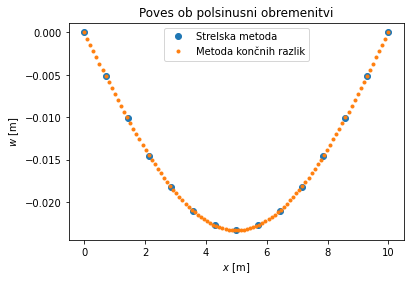

In [58]:
plt.title('Poves ob polsinusni obremenitvi')
plt.plot(sol_pol_sin.x, sol_pol_sin.y[0], 'o', label='Strelska metoda')
plt.plot(x, y_mkr[1:-1], '.', label='Metoda končnih razlik')
plt.xlabel('$x$ [m]')
plt.ylabel('$w$ [m]')
plt.legend()
plt.show()

# Dodatno: simbolna rešitev nosilca

Tukaj si bomo pogledali simbolno reševanje robnega problema. Poudariti je treba, da gre tukaj zgolj za zgled, ki ga lahko naredimo za obravnavani nosilec z relativno enostavno polsinusno obremenitvijo. **V praksi so seveda obremenitve in tudi oblike nosilca lahko bistveno bolj zahtevne in takrat druge poti kot numeričnega reševanja skoraj nimamo na voljo.**

Najprej uvozimo `sympy`:

In [59]:
import sympy as sym
sym.init_printing()

Definirajmo spremenljivke:

In [60]:
w = sym.Function('w')
x, E, I, F_0, l = sym.symbols('x, E, I, F_0, l')

Definirajmo differencialno enačbo (robne pogoje dodamo pozneje):

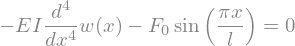

In [61]:
eq = sym.Eq(-E*I*w(x).diff(x,4)-F_0*sym.sin(sym.pi*x/l),0)
eq

Rešimo:

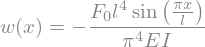

In [62]:
sol = sym.dsolve(eq, func=w(x), hint='nth_linear_constant_coeff_undetermined_coefficients',
                 ics={
                     w(0):0,                      #poves pri x=0 je nič
                     w(x).diff(x,2).subs(x, 0): 0,#moment pri x=0 je nič
                     w(x).subs(x, l): 0,                     #poves pri x=l je nič
                     w(x).diff(x, 2).subs(x, l): 0 #moment pri x=l je nič                 
                 })
sol

In [63]:
podatki = {E: 2.1e11, I: 2.1e-5, l: 10, F_0:1e3}
resitev_np = sym.lambdify(x, sol.rhs.subs(podatki), modules='numpy')
x_ana = np.linspace(0, podatki[l], 100)
y_ana = resitev_np(x_ana)

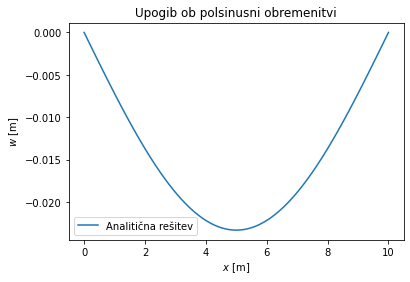

In [64]:
plt.title('Upogib ob polsinusni obremenitvi')
plt.plot(x_ana, y_ana, '-', label='Analitična rešitev')
plt.xlabel('$x$ [m]')
plt.ylabel('$w$ [m]')
plt.legend()
plt.show()

Primerjajmo sedaj analitično rešitev, z rešitivijo z metodo končnih razlik in strelsko metodo:

In [65]:
[np.min(y_ana), np.min(y_mkr), np.min(sol_pol_sin.y[0])]